<a href="https://colab.research.google.com/github/ebugarin/tf_flowers/blob/main/EricBugarinProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import os
import numpy as np
from PIL import Image

In [ ]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
zip_file = tf.keras.utils.get_file(origin=_URL, fname="flower_photos.tgz", extract=True, cache_subdir="/content")
base_dir = os.path.join(os.path.dirname(zip_file), "flower_photos")

In [ ]:
IMAGE_SIZE = 224 
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
rescale=1./255, 
validation_split=0.2
)

train_generator = datagen.flow_from_directory(
base_dir, 
target_size=(IMAGE_SIZE, IMAGE_SIZE), 
batch_size=BATCH_SIZE, 
subset='training'
)

val_generator = datagen.flow_from_directory(
base_dir, 
target_size=(IMAGE_SIZE, IMAGE_SIZE), 
batch_size=BATCH_SIZE, 
subset='validation'
)

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [ ]:
print(train_generator.class_indices) 
labels = '\n'.join(sorted(train_generator.class_indices.keys())) 
labels 
with open('labels.txt', 'w') as f:
  f.write(labels)



{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}


In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)
base_model = tf.keras. applications.MobileNetV2(input_shape=IMG_SHAPE,
                                                include_top=False, 
                                                weights='imagenet')

In [ ]:
base_model.trainable = False

In [ ]:
model = tf.keras. Sequential([
base_model, 
tf.keras.layers.Conv2D(32, 3, activation='relu'), 
tf.keras.layers. Dropout(0.2), 
tf.keras.layers.GlobalAveragePooling2D(),
tf.keras.layers.Dense(5, activation="softmax") 
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="categorical_crossentropy", 
              metrics=['accuracy'])

In [ ]:
epochs = 5
history = model.fit(train_generator,
                    epochs = epochs,
                    validation_data=val_generator)

Epoch 1/5
46/46 [==============================] - 103s 2s/step - loss: 1.2680 - accuracy: 0.5920 - val_loss: 0.7038 - val_accuracy: 0.7141
Epoch 2/5
46/46 [==============================] - 102s 2s/step - loss: 0.4635 - accuracy: 0.8323 - val_loss: 0.4548 - val_accuracy: 0.8345
Epoch 3/5
46/46 [==============================] - 98s 2s/step - loss: 0.2708 - accuracy: 0.9112 - val_loss: 0.4941 - val_accuracy: 0.8372
Epoch 4/5
46/46 [==============================] - 98s 2s/step - loss: 0.1802 - accuracy: 0.9405 - val_loss: 0.4393 - val_accuracy: 0.8536
Epoch 5/5
46/46 [==============================] - 98s 2s/step - loss: 0.1263 - accuracy: 0.9595 - val_loss: 0.4370 - val_accuracy: 0.8659


In [ ]:
data, labels = train_generator.next()
labels[3].shape, data[3].shape

((5,), (224, 224, 3))

# Linear Regression Model

In [ ]:
# Experiment model 1
"""
Creating Tensorflow Linear Regression Model
"""
inputs = Input((224,224,3)) 

# Flattening layer:
x = Flatten()(inputs)

x = Dense(300)(x)

x = Dropout(0.2)(x)

x = Dense(200)(x)

x = Dropout(0.2)(x)
x = Dense(150)(x)
x = Dense(100)(x)

outputs = Dense(5, activation="softmax")(x)
optim = tf.keras.optimizers.Adam() # Optimizer

loss = tf.keras.losses.CategoricalCrossentropy() # Loss

# Building the tensorflow model and passing inputs and outputs
LinearModel = tf.keras.Model(inputs=inputs, outputs=outputs,  name="Linear_Regression_Model")
# Compiling the model 
LinearModel.compile(optimizer=optim, loss=loss, metrics=["accuracy"])
# Fitting the model to train
lm_history = LinearModel.fit(train_generator,
                    epochs = 10,
                    validation_data=val_generator)

Epoch 1/10
46/46 [==============================] - 17s 302ms/step - loss: 129.7637 - accuracy: 0.2987 - val_loss: 16.7615 - val_accuracy: 0.3215
Epoch 2/10
46/46 [==============================] - 18s 403ms/step - loss: 13.1603 - accuracy: 0.3627 - val_loss: 6.7218 - val_accuracy: 0.4295
Epoch 3/10
46/46 [==============================] - 14s 300ms/step - loss: 6.6245 - accuracy: 0.4008 - val_loss: 5.6925 - val_accuracy: 0.3557
Epoch 4/10
46/46 [==============================] - 14s 298ms/step - loss: 5.0458 - accuracy: 0.4035 - val_loss: 3.4405 - val_accuracy: 0.4090
Epoch 5/10
46/46 [==============================] - 14s 297ms/step - loss: 3.6957 - accuracy: 0.4144 - val_loss: 2.4193 - val_accuracy: 0.4227
Epoch 6/10
46/46 [==============================] - 15s 311ms/step - loss: 2.5462 - accuracy: 0.4556 - val_loss: 2.2552 - val_accuracy: 0.4049
Epoch 7/10
46/46 [==============================] - 15s 327ms/step - loss: 2.3198 - accuracy: 0.4495 - val_loss: 2.6787 - val_accuracy: 0.

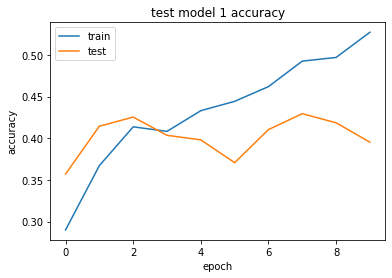

In [ ]:
plt.plot(lm_history.history['accuracy'])
plt.plot(lm_history.history['val_accuracy'])
plt.title('test model 1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Experiment linear model 2

inputs = Input((224,224,3))
x = Flatten()(inputs)
x = Dense(300)(x)
x = Dense(200)(x)
x = Dense(100)(x)
outputs = Dense(5, activation="softmax")(x)

optim = tf.keras.optimizers.Adam() # Optimizer
loss = tf.keras.losses.CategoricalCrossentropy() # Loss

test_2 = tf.keras.Model(inputs=inputs, outputs=outputs,  name="Linear_Regression_Model")
test_2.compile(optimizer=optim, loss=loss, metrics=["accuracy"])
test_2_history = test_2.fit(train_generator,
                    epochs = 5,
                    validation_data=val_generator)

Epoch 1/5
46/46 [==============================] - 14s 303ms/step - loss: 135.8890 - accuracy: 0.3069 - val_loss: 23.1439 - val_accuracy: 0.3488
Epoch 2/5
46/46 [==============================] - 13s 290ms/step - loss: 10.6020 - accuracy: 0.4025 - val_loss: 7.0215 - val_accuracy: 0.2955
Epoch 3/5
46/46 [==============================] - 13s 293ms/step - loss: 3.1793 - accuracy: 0.4046 - val_loss: 3.4266 - val_accuracy: 0.3926
Epoch 4/5
46/46 [==============================] - 14s 295ms/step - loss: 1.5323 - accuracy: 0.5131 - val_loss: 1.9648 - val_accuracy: 0.4200
Epoch 5/5
46/46 [==============================] - 13s 293ms/step - loss: 1.1850 - accuracy: 0.5458 - val_loss: 1.4960 - val_accuracy: 0.4323


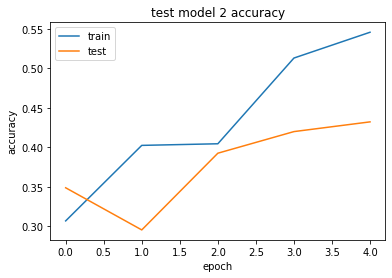

In [ ]:
plt.plot(test_2_history.history['accuracy'])
plt.plot(test_2_history.history['val_accuracy'])
plt.title('test model 2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Experiment linear model 3
# Using stochastic gradient descent algorithm for optimization and learning rate=0.01

inputs = Input((224,224,3))
x = Flatten()(inputs)
x = Dense(100)(x)
outputs = Dense(5, activation="softmax")(x)

optim = tf.keras.optimizers.SGD(learning_rate=0.01) # Optimizer
loss = tf.keras.losses.CategoricalCrossentropy() # Loss

test_3 = tf.keras.Model(inputs=inputs, outputs=outputs,  name="Linear_Regression_Model")
test_3.compile(optimizer=optim, loss=loss, metrics=["accuracy"])
test_3_history = test_3.fit(train_generator,
                    epochs = 5,
                    validation_data=val_generator)

Epoch 1/5
46/46 [==============================] - 14s 298ms/step - loss: 436.1297 - accuracy: 0.2137 - val_loss: 199.7618 - val_accuracy: 0.2449
Epoch 2/5
46/46 [==============================] - 13s 288ms/step - loss: 31.6677 - accuracy: 0.2855 - val_loss: 1.4224 - val_accuracy: 0.3639
Epoch 3/5
46/46 [==============================] - 13s 288ms/step - loss: 1.5189 - accuracy: 0.3777 - val_loss: 1.4623 - val_accuracy: 0.3735
Epoch 4/5
46/46 [==============================] - 13s 284ms/step - loss: 1.3950 - accuracy: 0.4100 - val_loss: 1.5718 - val_accuracy: 0.3338
Epoch 5/5
46/46 [==============================] - 13s 286ms/step - loss: 1.3453 - accuracy: 0.4223 - val_loss: 1.3591 - val_accuracy: 0.4104


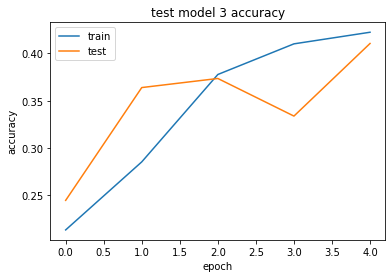

In [ ]:
plt.plot(test_3_history.history['accuracy'])
plt.plot(test_3_history.history['val_accuracy'])
plt.title('test model 3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Experiment linear model 4

inputs = Input((224,224,3))
x = Flatten()(inputs)
x = Dense(300)(x)
x = Dense(200)(x)
x = Dense(100)(x)
outputs = Dense(5, activation="softmax")(x)

optim = tf.keras.optimizers.SGD() # Optimizer
loss = tf.keras.losses.CategoricalCrossentropy() # Loss

test_4 = tf.keras.Model(inputs=inputs, outputs=outputs,  name="Linear_Regression_Model")
test_4.compile(optimizer=optim, loss=loss, metrics=["accuracy"])
test_4_history = test_4.fit(train_generator,
                    epochs = 5,
                    validation_data=val_generator)

Epoch 1/5
46/46 [==============================] - 14s 301ms/step - loss: nan - accuracy: 0.1800 - val_loss: nan - val_accuracy: 0.1724
Epoch 2/5
46/46 [==============================] - 13s 290ms/step - loss: nan - accuracy: 0.1725 - val_loss: nan - val_accuracy: 0.1724
Epoch 3/5
46/46 [==============================] - 13s 291ms/step - loss: nan - accuracy: 0.1725 - val_loss: nan - val_accuracy: 0.1724
Epoch 4/5
46/46 [==============================] - 13s 288ms/step - loss: nan - accuracy: 0.1725 - val_loss: nan - val_accuracy: 0.1724
Epoch 5/5
46/46 [==============================] - 15s 318ms/step - loss: nan - accuracy: 0.1725 - val_loss: nan - val_accuracy: 0.1724


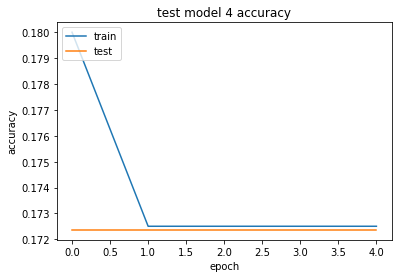

In [ ]:
plt.plot(test_4_history.history['accuracy'])
plt.plot(test_4_history.history['val_accuracy'])
plt.title('test model 4 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Experiment linear model 5

inputs = Input((224,224,3))
x = Flatten()(inputs)
x = Dense(64)(x)
x = Dense(32)(x)
outputs = Dense(5, activation="softmax")(x)

optim = tf.keras.optimizers.Adam() # Optimizer
loss = tf.keras.losses.CategoricalCrossentropy() # Loss

test_5 = tf.keras.Model(inputs=inputs, outputs=outputs,  name="Linear_Regression_Model")
test_5.compile(optimizer=optim, loss=loss, metrics=["accuracy"])
test_5_history = test_5.fit(train_generator,
                    epochs = 5,
                    validation_data=val_generator)

Epoch 1/5
46/46 [==============================] - 14s 299ms/step - loss: 91.5149 - accuracy: 0.3185 - val_loss: 22.5512 - val_accuracy: 0.3502
Epoch 2/5
46/46 [==============================] - 13s 287ms/step - loss: 20.5039 - accuracy: 0.3855 - val_loss: 26.6240 - val_accuracy: 0.2982
Epoch 3/5
46/46 [==============================] - 13s 281ms/step - loss: 16.5439 - accuracy: 0.4226 - val_loss: 14.6691 - val_accuracy: 0.4118
Epoch 4/5
46/46 [==============================] - 13s 280ms/step - loss: 9.0209 - accuracy: 0.4702 - val_loss: 11.2310 - val_accuracy: 0.3953
Epoch 5/5
46/46 [==============================] - 13s 280ms/step - loss: 8.6262 - accuracy: 0.4699 - val_loss: 17.0298 - val_accuracy: 0.3078


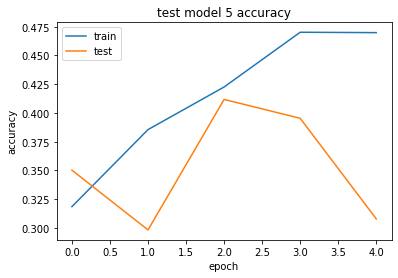

In [ ]:
plt.plot(test_5_history.history['accuracy'])
plt.plot(test_5_history.history['val_accuracy'])
plt.title('test model 5 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Experiment linear model 6

inputs = Input((224,224,3))
x = Flatten()(inputs)
x = Dense(64, activation="relu")(x)
x = Dense(32, activation="relu")(x)
outputs = Dense(5, activation="softmax")(x)

optim = tf.keras.optimizers.Adam() # Optimizer
loss = tf.keras.losses.CategoricalCrossentropy() # Loss

test_6 = tf.keras.Model(inputs=inputs, outputs=outputs,  name="Linear_Regression_Model")
test_6.compile(optimizer=optim, loss=loss, metrics=["accuracy"])
test_6_history = test_6.fit(train_generator,
                    epochs = 5,
                    validation_data=val_generator)


Epoch 1/5
46/46 [==============================] - 14s 297ms/step - loss: 3.5520 - accuracy: 0.2093 - val_loss: 1.6093 - val_accuracy: 0.2093
Epoch 2/5
46/46 [==============================] - 13s 282ms/step - loss: 1.6070 - accuracy: 0.2150 - val_loss: 1.6080 - val_accuracy: 0.2148
Epoch 3/5
46/46 [==============================] - 13s 288ms/step - loss: 1.6036 - accuracy: 0.2178 - val_loss: 1.5796 - val_accuracy: 0.2914
Epoch 4/5
46/46 [==============================] - 13s 287ms/step - loss: 1.5890 - accuracy: 0.2531 - val_loss: 1.5935 - val_accuracy: 0.2873
Epoch 5/5
46/46 [==============================] - 13s 285ms/step - loss: 1.4769 - accuracy: 0.3729 - val_loss: 1.6073 - val_accuracy: 0.3064


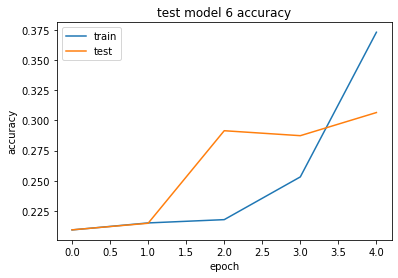

In [ ]:

plt.plot(test_6_history.history['accuracy'])
plt.plot(test_6_history.history['val_accuracy'])
plt.title('test model 6 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_31 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_31[0][0]']               
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
test_2.summary() #From Experiments Linear Regression best model is model 2

Model: "Linear_Regression_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 flatten_25 (Flatten)        (None, 150528)            0         
                                                                 
 dense_93 (Dense)            (None, 300)               45158700  
                                                                 
 dense_94 (Dense)            (None, 200)               60200     
                                                                 
 dense_95 (Dense)            (None, 100)               20100     
                                                                 
 dense_96 (Dense)            (None, 5)                 505       
                                                                 
Total params: 45,239,505
Trainable params: 

In [ ]:
test_2.evaluate(val_generator)

12/12 [==============================] - 3s 209ms/step - loss: 1.4960 - accuracy: 0.4323


[1.496049165725708, 0.43228453397750854]

# **Implementing Multiclass Logistic Regression Model**

In [ ]:
base = "/content/flower_photos"
images = []
label = []
os.rmdir(base+"/"+".ipynb_checkpoints")
for file in os.listdir(base):
    for imgp in os.listdir(base+"/"+file):
        img = Image.open(base+"/"+file+"/"+imgp)
        img = img.resize((224,224))
        img = images.append(np.array(img))
        if file=="roses":
            label.append(0)
        elif file=="dandelion":
            label.append(1)
        elif file=="daisy":
            label.append(2)
        elif file=="tulips":
            label.append(3)
        else:
            label.append(4)

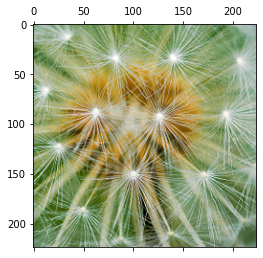

In [ ]:
plt.matshow(images[938])

In [ ]:
label[938]

1

In [ ]:
arr = np.array(images)
lbl = np.array(label)

In [ ]:
d1, d2, d3, d4 = arr.shape
x_data_reshaped = arr.reshape((d1, d2*d3*d4))
x_data_reshaped.shape

(3670, 150528)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_data_reshaped, lbl, test_size=0.33, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((2458, 150528), (2458,))

In [ ]:
clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=10,
                        verbose=2,
                        n_jobs=-1,
                        C=1)

clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 126 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.1min finished


LogisticRegression(C=1, max_iter=10, n_jobs=-1, solver='saga', verbose=2)

In [ ]:
clf.score(X_train, y_train) # training score

0.7058584214808787

In [ ]:
score = clf.score(X_test, y_test) # test score
score

0.45957095709570955